In [1]:
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import torch.optim as optim
import torchvision.transforms as transforms

In [2]:
import torchvision as tv
import torch.nn as nn
import torch.nn.functional as F
loss_function = nn.MSELoss()

In [3]:
import os
from zipfile import ZipFile
from PIL import Image
from tqdm import tqdm

In [6]:
#importing data

In [4]:
train_path = 'E:\\Study material\\Models and Datasets\\SIH\\New folder (5)\\HELEN\\training data'
anno_path = 'E:\\Study material\\Models and Datasets\\SIH\\New folder (5)\\HELEN\\annotation'
test_path = 'E:\\Study material\\Models and Datasets\\SIH\\New folder (5)\\Version 1 - C'
def ano_and_img(path):
    '''This Function will load the annotations and the images ordered by Index'''
    anotation_path = path
    anotations = [[] for s in range(2330)]
    n = 0
    imges = []
    for anot in os.listdir(anotation_path):
        xes = []
        yes = []
        f = open(os.path.join(anotation_path, anot), 'r')
        pntr = 0
        for line in f:
            if pntr == 0:
                line = line.strip("\n")
                img = Image.open(train_path + "\\" +line +'.jpg')
                imges.append(img)         

            if pntr != 0:
                x, y = line.split(',')
                xes.append(float(x))
                yes.append(float(y))
            pntr += 1
        for s in range(len(xes)-1):
            anotations[n].append([xes[s], yes[s]])
        n += 1
    return  anotations,imges


def old_image_size(image):
    return image.size

def image_size_storage(i):
    sto = {}
    for k,img in enumerate(i):
        sto[str(k)] = old_image_size(i[k])
    return sto

def image_resize_bw(img, size = (340,255)):
    for i in range(len(img)):
        img[i] = img[i].resize(size).convert('L')
    
def rescale_anno(sto, a, scale=(340,255)):
    for i in range(len(sto)):
        width,height = sto[str(i)]
        xf,yf = width/scale[0], height/scale[1]
        l = a[i]
        for j in range(len(l)):
            l[j][0] /=xf
            l[j][1] /= yf
    return 0
def tens(img):
    pil2tensor = transforms.ToTensor()
    a = pil2tensor(img)
    a = a.unsqueeze(0)
    return a
    
def image_totensor(i):
    ten =[]
    for j in range(int(len(i))):
        bw_image = tens(i[j])
        ten.append(bw_image)
    return ten

def load_test(path, size = (340,255)):
    test = []
    for img in os.listdir(path):
        image = Image.open(os.path.join(path, img))
        resized_image = image.resize(size).convert('L')
        test.append(resized_image)
    return test
    
test = load_test(test_path)
test_tensor = image_totensor(test)

In [6]:
test_tensor[0].shape

torch.Size([1, 1, 255, 340])

In [7]:
a,img = ano_and_img(anno_path)
sto = image_size_storage(img)
rescale_anno(sto,a)
image_resize_bw(img)
# train_x = img[:-validation_size]
# train_x = image_totensor(train_x)

In [8]:
ten = image_totensor(img)

In [9]:
validation_per = 0.1
epochs = 100
batch = 60
validation_size = int(len(ten)*validation_per)
train_x = ten[:-validation_size]
train_y = a[:-validation_size]

In [10]:
#train_x = train_x[0]
q = [t.size() for t in my_list_of_tensors]
train_x = torch.FloatTensor(train_x)

NameError: name 'my_list_of_tensors' is not defined

In [13]:
validation_x = train_x[:validation_size]
validation_y = train_y[:validation_size]

In [14]:
train_y = np.asarray(train_y, dtype=np.float32)
validation_y = np.asarray(validation_y, dtype=np.float32)

In [15]:
type(train_x)

list

In [35]:
print(type(train_x))
print(type(train_y))
print(type(validation_x))
print(type(validation_y))

<class 'torch.Tensor'>
<class 'numpy.ndarray'>
<class 'torch.Tensor'>
<class 'numpy.ndarray'>


In [36]:
torch.save(train_x, 'train_x.pt')
torch.save(validation_x, 'validation_x.pt')
# torch.load('file.pt')

In [37]:
np.save('train_y.npy', train_y)
np.save('validation_y.npy', validation_y)
# np.load(outfile)

## visualization

In [38]:
def get_co(lst):
    x = []
    y = []
    for a, b in lst:
        x.append(a)
        y.append(b)
    return x, y 

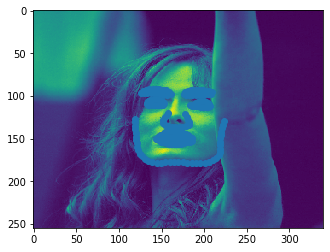

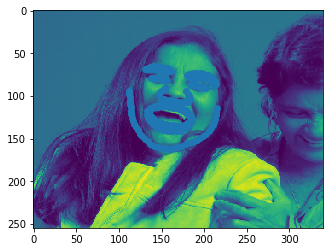

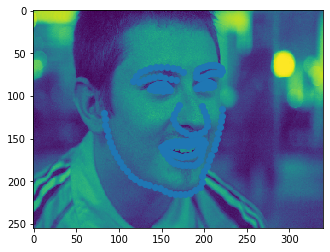

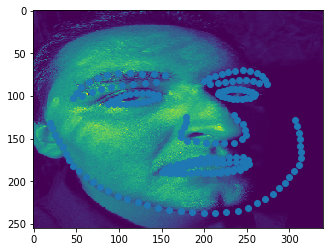

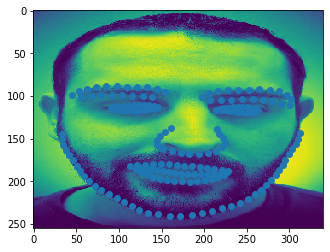

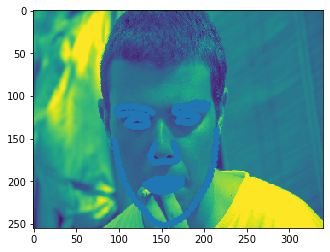

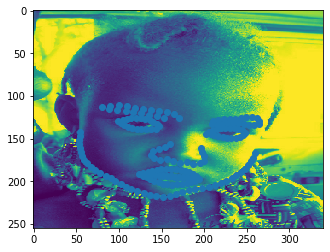

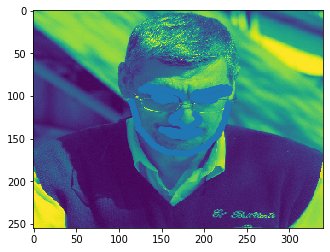

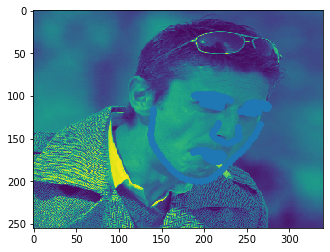

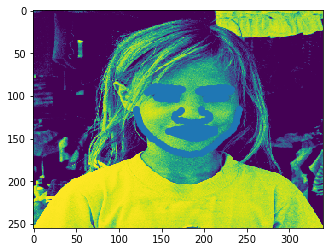

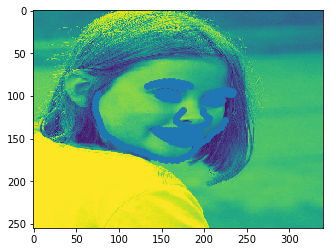

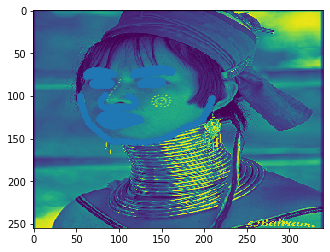

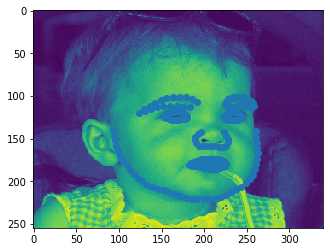

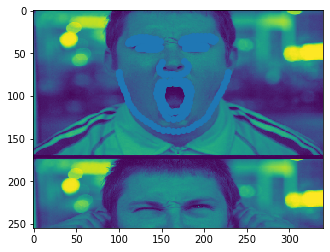

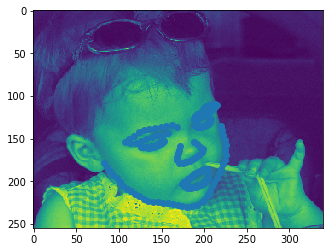

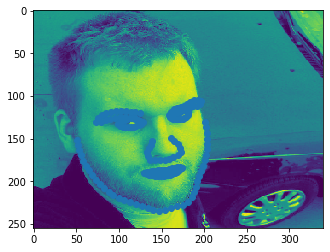

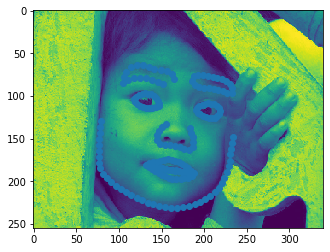

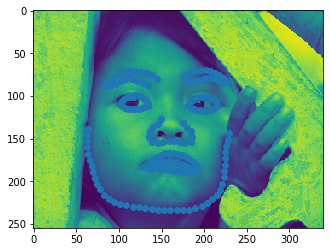

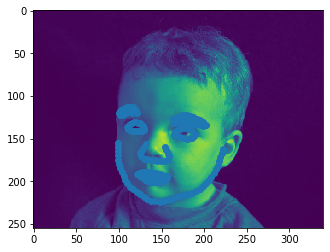

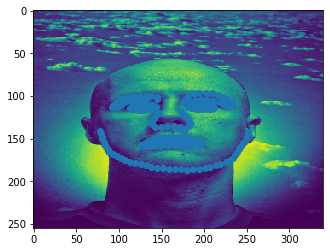

In [47]:
for i in range(20):
    plt.imshow(train_x[i].view(255,340))
    x, y = get_co(train_y[i])
    plt.scatter(x, y)
    plt.show()

In [44]:
plt.imshow(train_x[2])

IndexError: index 2 is out of bounds for dimension 0 with size 1

In [12]:
len(train_x)

2097

In [19]:
t_train_x = torch.Tensor(2097, 1, 255, 340)
torch.cat(train_x, out=t_train_x)

tensor([[[[0.5059, 0.4941, 0.5098,  ..., 0.0118, 0.0118, 0.0157],
          [0.5176, 0.4980, 0.4980,  ..., 0.0118, 0.0118, 0.0118],
          [0.5098, 0.5333, 0.5176,  ..., 0.0118, 0.0118, 0.0118],
          ...,
          [0.1098, 0.1098, 0.1020,  ..., 0.0902, 0.0941, 0.1059],
          [0.1176, 0.1059, 0.1059,  ..., 0.1059, 0.1098, 0.1098],
          [0.0980, 0.0824, 0.1020,  ..., 0.1216, 0.1176, 0.1176]]],


        [[[0.3451, 0.3451, 0.3412,  ..., 0.3882, 0.3961, 0.3843],
          [0.3451, 0.3451, 0.3412,  ..., 0.3765, 0.3843, 0.3843],
          [0.3529, 0.3529, 0.3490,  ..., 0.3765, 0.3765, 0.3804],
          ...,
          [0.3490, 0.3373, 0.3412,  ..., 0.5412, 0.6000, 0.6549],
          [0.3529, 0.3490, 0.3490,  ..., 0.6275, 0.6745, 0.6784],
          [0.3569, 0.3647, 0.3529,  ..., 0.6745, 0.6902, 0.6980]]],


        [[[0.7804, 0.8000, 0.8353,  ..., 0.3647, 0.3569, 0.3333],
          [0.7804, 0.8157, 0.8392,  ..., 0.3333, 0.3451, 0.3922],
          [0.8471, 0.8314, 0.8392,  ..

In [17]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.c1 = nn.Conv2d(in_channels = 1, out_channels = 32, stride=1, kernel_size=2)
        self.c2 = nn.Conv2d(in_channels = 32, out_channels = 64, stride = 1, kernel_size=2)
        self.c3 = nn.Conv2d(in_channels = 64, out_channels = 128, stride = 1, kernel_size=2)
        self.c4 = nn.Conv2d(in_channels = 128, out_channels = 256, stride = 1, kernel_size=2)
        self.c5 = nn.Conv2d(in_channels = 256, out_channels = 256, stride = 1, kernel_size=2)
        self.c6 = nn.Conv2d(in_channels = 256, out_channels = 256, stride = 1, kernel_size=2)
        self.c7 = nn.Conv2d(in_channels = 256, out_channels = 512, stride = 1, kernel_size=2)
        #self.c8 = nn.Conv2d(in_channels = 512, out_channels = 512, stride = 1, kernel_size=2)
        #self.c9 = nn.Conv2d(in_channels = 512, out_channels = 512, stride = 1, kernel_size=2)
        #x = torch.randn(255,340).view(-1,1,255,340)
        #self.x = x
        #self._ln_output = None
        #self.convs(x)
        self.ln = nn.Linear(in_features= 512, out_features= 193*2)
        #self.optimizer = optim.Adam(net.parameters(), lr=0.01)
        #self.loss_function = nn.MSELoss()
        
    def convs(self, x):
        x = F.max_pool2d(F.relu(self.c1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.c2(x)), (2,2))
        x = F.max_pool2d(F.relu(self.c3(x)), (2,2))
        x = F.max_pool2d(F.relu(self.c4(x)), (2,2))
        x = F.max_pool2d(F.relu(self.c5(x)), (2,2))
        x = F.max_pool2d(F.relu(self.c6(x)), (2,2))
        x = F.max_pool2d(F.relu(self.c7(x)), (2,2))
        #x = F.max_pool2d(F.relu(self.c8(x)), (2,2))
        #x = F.max_pool2d(F.relu(self.c9(x)), (2,2))
        
        #print(x[0].shape)
        #if self._ln_output is None:
         #   self._ln_output = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
          #  print('neurons = ', self._ln_output)
        self._ln_output = 512
        return x
                         
    def forward(self, dat):
        dat = self.convs(dat)
        dat = dat.view(-1, self._ln_output)  # .view is reshape ... this flattens X before 
        dat = F.log_softmax(self.ln(dat), dim = 1)
        return dat
    
    def optimise(self,outputs):
        loss = self.loss_function(outputs, batch_y)
        loss.backward()
        self.optimizer.step()

In [21]:
net = Net()
t_tensor = transforms.ToTensor()
optimizer = optim.Adam(net.parameters(), lr=0.01)
batch = 10
# for i in range(epochs):
for j in tqdm(range(3)):
    print(f"Epoch: {j}")
    for i in range(0, len(t_train_x), batch): # from 0, to the len of x, stepping BATCH_SIZE at a time. [:50] ..for now just to dev
        #print(f"{i}:{i+BATCH_SIZE}")
        
        batch_X = t_train_x[i:i+batch]
#         print(batch_X)
        
        
#         batch_X = batch_X/255.0
#         print(batch_X)
#         input()
        batch_y = torch.FloatTensor(train_y[i:i+batch])
        batch_y = batch_y.view(batch,batch_y.shape[1]*batch_y.shape[2])
        print(type(batch_X))
        print(batch_y.shape)
        net.zero_grad()

        outputs = net.forward(batch_X)
        loss = loss_function(outputs, batch_y)
        loss.backward()
        optimizer.step()    # Does the update
        #final = net.optimise(outputs)
        print(f"LOSS :{loss}")



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Epoch: 0
<class 'torch.Tensor'>
torch.Size([10, 386])
LOSS :28861.2265625
<class 'torch.Tensor'>
torch.Size([10, 386])
LOSS :37921.39453125
<class 'torch.Tensor'>
torch.Size([10, 386])
LOSS :28476.671875
<class 'torch.Tensor'>
torch.Size([10, 386])
LOSS :26542.78515625
<class 'torch.Tensor'>
torch.Size([10, 386])
LOSS :25595.30078125
<class 'torch.Tensor'>
torch.Size([10, 386])
LOSS :26430.181640625
<class 'torch.Tensor'>
torch.Size([10, 386])
LOSS :25742.927734375
<class 'torch.Tensor'>
torch.Size([10, 386])
LOSS :24338.83203125
<class 'torch.Tensor'>
torch.Size([10, 386])
LOSS :25102.173828125
<class 'torch.Tensor'>
torch.Size([10, 386])
LOSS :28643.484375
<class 'torch.Tensor'>
torch.Size([10, 386])
LOSS :25972.015625
<class 'torch.Tensor'>
torch.Size([10, 386])
LOSS :27113.4609375
<class 'torch.Tensor'>
torch.Size([10, 386])
LOSS :26388.455078125
<class 'torch.Tensor'>
torch.Size([10, 386])
LOSS :24968.98828125
<class 'torch.Tensor'>
torch.Size([10, 386])
LOSS :26496.43359375
<clas

<class 'torch.Tensor'>
torch.Size([10, 386])
LOSS :28800.716796875
<class 'torch.Tensor'>
torch.Size([10, 386])
LOSS :26071.513671875
<class 'torch.Tensor'>
torch.Size([10, 386])
LOSS :24359.98046875
<class 'torch.Tensor'>
torch.Size([10, 386])
LOSS :25446.25
<class 'torch.Tensor'>
torch.Size([10, 386])
LOSS :29253.1640625
<class 'torch.Tensor'>
torch.Size([10, 386])
LOSS :27824.74609375
<class 'torch.Tensor'>
torch.Size([10, 386])
LOSS :25754.345703125
<class 'torch.Tensor'>
torch.Size([10, 386])
LOSS :25629.734375
<class 'torch.Tensor'>
torch.Size([10, 386])
LOSS :28066.62890625
<class 'torch.Tensor'>
torch.Size([10, 386])
LOSS :28260.498046875
<class 'torch.Tensor'>
torch.Size([10, 386])
LOSS :25955.830078125
<class 'torch.Tensor'>
torch.Size([10, 386])
LOSS :24826.2109375
<class 'torch.Tensor'>
torch.Size([10, 386])
LOSS :24910.341796875
<class 'torch.Tensor'>
torch.Size([10, 386])
LOSS :27838.25
<class 'torch.Tensor'>
torch.Size([10, 386])
LOSS :26003.720703125
<class 'torch.Tenso

RuntimeError: shape '[10, 386]' is invalid for input of size 2702

In [30]:
x = [[2,4,6],[1, 5, 7],[4,2,6],[6,7,8]]
q = x[:-2]
v = x[]

In [31]:
print(x)
print(q)
print(v)

[[2, 4, 6], [1, 5, 7], [4, 2, 6], [6, 7, 8]]
[[2, 4, 6], [1, 5, 7]]
[[4, 2, 6], [6, 7, 8]]
